In [25]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dt_clf=DecisionTreeClassifier(random_state=24)
iris=load_iris()
iris_data=iris.data
iris_label=iris.target
X_train, X_test, y_train, y_test=train_test_split(iris_data, iris_label, test_size=0.2, random_state=23)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=24, splitter='best')

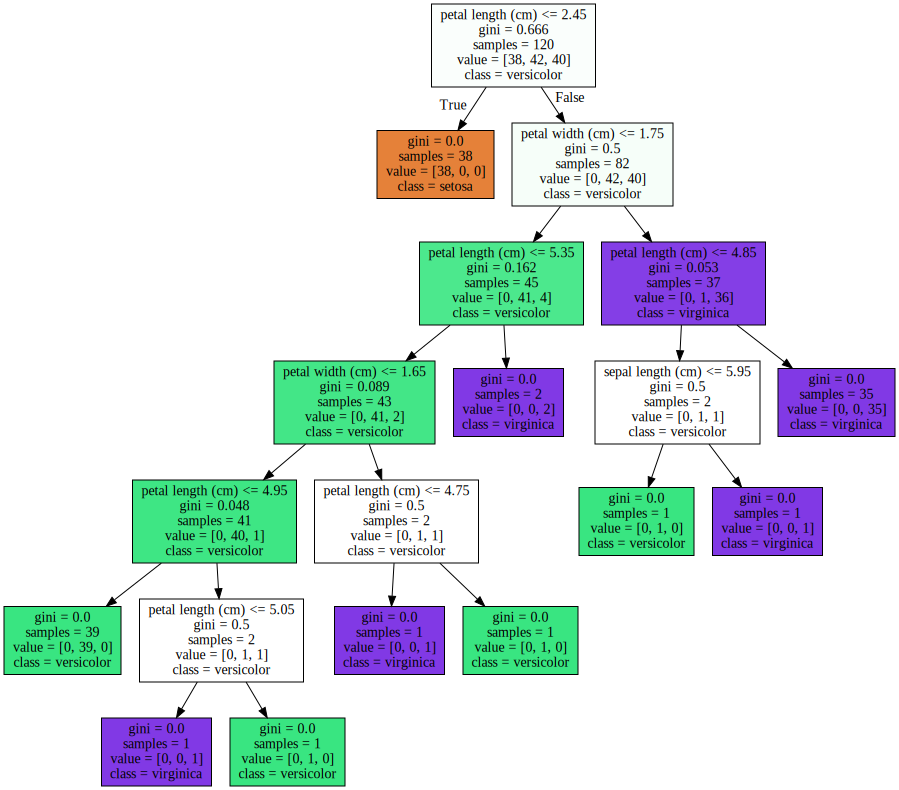

In [21]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf, out_file='tree.dot', class_names=iris.target_names, feature_names=iris.feature_names, impurity=True, filled=True)

import graphviz
with open('tree.dot') as f:
  dot_graph=f.read()
graphviz.Source(dot_graph)

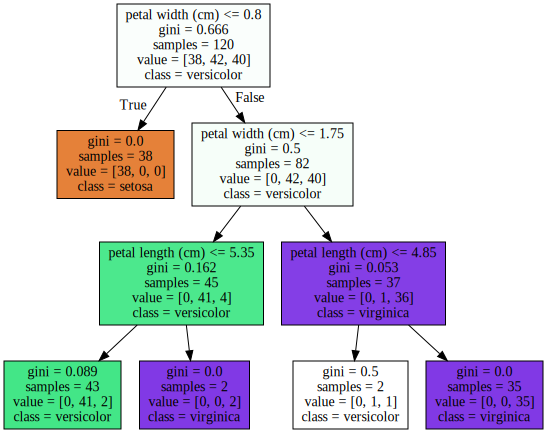

In [8]:
dt_clf_max=DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)

export_graphviz(dt_clf_max, out_file='tree.dot_max', class_names=iris.target_names, feature_names=iris.feature_names, impurity=True, filled=True)

import graphviz
with open('tree.dot_max') as d:
  dot_graph2=d.read()
graphviz.Source(dot_graph2)

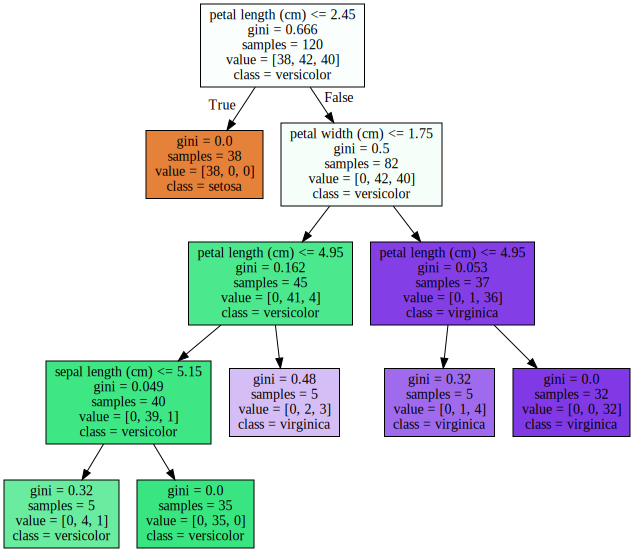

In [9]:
dt_clf_min_leaf=DecisionTreeClassifier(min_samples_leaf=5).fit(X_train, y_train)

export_graphviz(dt_clf_min_leaf, out_file='tree.dot_min_leaf', class_names=iris.target_names, feature_names=iris.feature_names, impurity=True, filled=True)

import graphviz
with open('tree.dot_min_leaf') as d:
  dot_graph3=d.read()
graphviz.Source(dot_graph3)

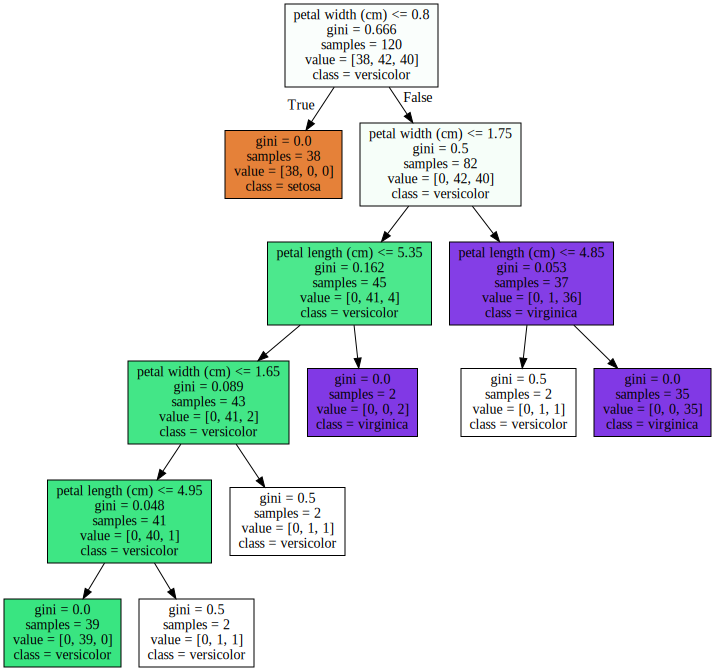

In [11]:
dt_clf_min_split=DecisionTreeClassifier(min_samples_split=5).fit(X_train, y_train)

export_graphviz(dt_clf_min_split, out_file='tree.dot_min_split', class_names=iris.target_names, feature_names=iris.feature_names, impurity=True, filled=True)

import graphviz
with open('tree.dot_min_split') as d:
  dot_graph4=d.read()
graphviz.Source(dot_graph4)

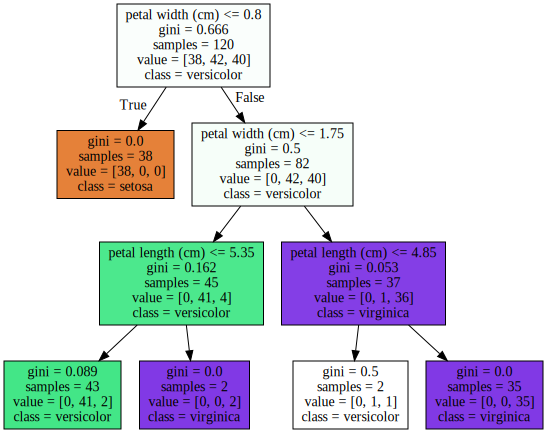

In [12]:
dt_clf_max_leaf=DecisionTreeClassifier(max_leaf_nodes=5).fit(X_train, y_train)

export_graphviz(dt_clf_max_leaf, out_file='tree.dot_max_leaf', class_names=iris.target_names, feature_names=iris.feature_names, impurity=True, filled=True)

import graphviz
with open('tree.dot_max_leaf') as d:
  dot_graph5=d.read()
graphviz.Source(dot_graph5)

Feature Importance : [0.023 0.017 0.063 0.897]
sepal length (cm) : 0.023
sepal width (cm) : 0.017
petal length (cm) : 0.063
petal width (cm) : 0.897


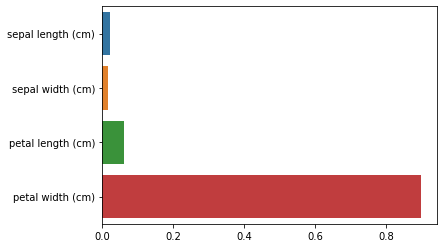

In [26]:
import seaborn as sns
import numpy as np
%matplotlib inline

print('Feature Importance : {0}'.format(np.round(dt_clf.feature_importances_, 3)))

for name, value in zip(iris.feature_names, dt_clf.feature_importances_):
  print('{0} : {1:.3f}'.format(name, value))

sns.barplot(x=dt_clf.feature_importances_, y=iris.feature_names)

In [28]:
from sklearn.datasets import make_classification

X_features, y_labels=make_classification(n_features=2, n_redundant=0, n_informative=2, n_classes=3, n_clusters_per_class=1, random_state=0)

In [29]:
print('클래스 값 : ', np.unique(y_labels))
print(len(y_labels))
print(type(y_labels))

클래스 값 :  [0 1 2]
100
<class 'numpy.ndarray'>


In [30]:
print(X_features[0:5, :])
print(type(X_features))
print(X_features.shape)

[[ 0.12041909 -1.68941375]
 [ 1.09665605  1.79445113]
 [ 0.88426577  1.43370121]
 [ 0.95048011 -0.56202253]
 [ 1.04421447  0.02899023]]
<class 'numpy.ndarray'>
(100, 2)


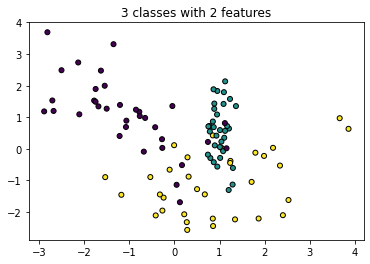

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.title('3 classes with 2 features')
plt.scatter(X_features[:,0], X_features[:,1], marker='o', c=y_labels, s=25, edgecolor='k')

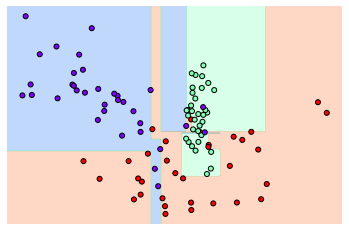

In [35]:
def visualize_boundary(model, X, y):
  fig, ax=plt.subplots()
  ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k', clim=(y.min(), y.max()), zorder=3)
  ax.axis('tight')
  ax.axis('off')
  xlim_start, xlim_end=ax.get_xlim()
  ylim_start, ylim_end=ax.get_ylim()
  model.fit(X, y)
  xx, yy=np.meshgrid(np.linspace(xlim_start, xlim_end, num=200), np.linspace(ylim_start, ylim_end, num=200))
  Z=model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
  n_classes=len(np.unique(y))
  contours=ax.contourf(xx, yy, Z, alpha=0.3, levels=np.arange(n_classes+1)-0.5, cmap='rainbow', clim=(y.min()-y.max()))

dt_clf=DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

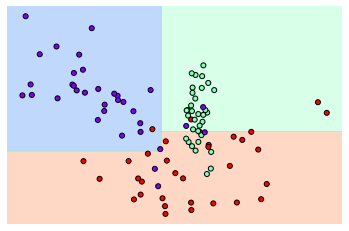

In [36]:
dt_clf=DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, min_samples_split=5).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

In [38]:
from sklearn.model_selection import GridSearchCV

parameters={'max_depth':[1,2,3,4,5,6], 'min_samples_split':[1,2,3,4,5,6], 'min_samples_leaf':[1,2,3,4,5,6], 'max_leaf_nodes':[1,2,3,4,5,6]}
dtree=DecisionTreeClassifier()
grid_dtree=GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True)
grid_dtree.fit(X_train, y_train)
print('최적 하이퍼 파라미터 : {0}'.format(grid_dtree.best_params_))

최적 하이퍼 파라미터 : {'max_depth': 2, 'max_leaf_nodes': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


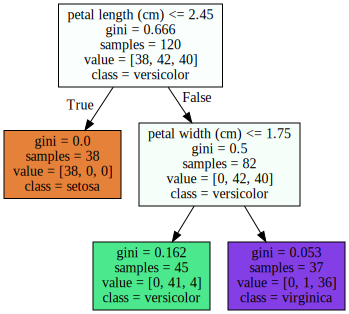

In [39]:
dt_clf_best=DecisionTreeClassifier(max_depth=2, max_leaf_nodes=3, min_samples_leaf=1, min_samples_split=2).fit(X_train, y_train)

export_graphviz(dt_clf_best, out_file='tree.dot_best', class_names=iris.target_names, feature_names=iris.feature_names, impurity=True, filled=True)

import graphviz
with open('tree.dot_best') as d:
  dot_graph=d.read()
graphviz.Source(dot_graph)

In [40]:
import pandas as pd

In [44]:
feature_name_df=pd.read_csv('./features.txt', sep='\s+', header=None, names=['column_index', 'column_name'])
feature_name=feature_name_df.iloc[:,1].values.tolist()
print('전체 피처명에서 10개만 추출 : ', feature_name[:10])

전체 피처명에서 10개만 추출 :  ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [48]:
feature_dup_df=feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index']>1].count())
feature_dup_df[feature_dup_df['column_index']>1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [61]:
def get_new_feature_name_df(old_feature_name_df):
  feature_dup_df=pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),columns=['dup_cnt'])
  feature_dup_df=feature_dup_df.reset_index()
  new_feature_name_df=pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
  new_feature_name_df['column_name']=new_feature_name_df[['column_name','dup_cnt']].apply(lambda x: x[0]+'-'+str(x[1]) if x[1]>0 else x[0], axis=1)
  new_feature_name_df=new_feature_name_df.drop(['index'], axis=1)
  return new_feature_name_df

In [62]:
def get_human_dataset():
  feature_name_df=pd.read_csv('./features.txt', sep='\s+', header=None, names=['column_index', 'column_name'])
  new_feature_name_df=get_new_feature_name_df(feature_name_df)
  feature_name=new_feature_name_df.iloc[:,1].values.tolist()
  X_train=pd.read_csv('./X_train.txt',sep='\s+', names=feature_name)
  X_test=pd.read_csv('./X_test.txt', sep='\s+', names=feature_name)
  y_train=pd.read_csv('./y_train.txt', sep='\s+', header=None, names=['action'])
  y_test=pd.read_csv('./y_test.txt', sep='\s+', header=None, names=['action'])

  return X_train, X_test, y_train, y_test

In [63]:
X_train, X_test, y_train, y_test=get_human_dataset()

In [64]:
print('##학습 피러 데이터셋 info()')
print(X_train.info())

##학습 피러 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [65]:
print(y_train['action'].value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


In [66]:
from sklearn.metrics import accuracy_score

dt_clf=DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred=dt_clf.predict(X_test)
accuracy=accuracy_score(y_test, pred)
print('DecisionTree 예측 정확도 : {0:.4f}'.format(accuracy))
print('\nDecisionTreeCLassifier 기본 하이퍼파라미터:\n', dt_clf.get_params())

DecisionTree 예측 정확도 : 0.8548

DecisionTreeCLassifier 기본 하이퍼파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 156, 'splitter': 'best'}


In [67]:
from sklearn.model_selection import GridSearchCV

params={'max_depth': [6,8,10,12,16,20,24]}
grid_cv=GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치 : {0:4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터 : ', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  1.9min finished


GridSearchCV 최고 평균 정확도 수치 : 0.851344
GridSearchCV 최적 하이퍼 파라미터 :  {'max_depth': 16}


In [68]:
cv_results_df=pd.DataFrame(grid_cv.cv_results_)
cv_results_df[['param_max_depth','mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844135
4,16,0.851344
5,20,0.850800
6,24,0.849440


In [69]:
max_depth=[6,8,10,12,16,20,24]

for depth in max_depth:
  dt_clf=DecisionTreeClassifier(max_depth=depth, random_state=146)
  dt_clf.fit(X_train, y_train)
  pred=dt_clf.predict(X_test)
  accuracy=accuracy_score(y_test, pred)
  print('max_depth={0} 정확도 : {1:.4f}'.format(depth, accuracy))

max_depth=6 정확도 : 0.8554
max_depth=8 정확도 : 0.8738
max_depth=10 정확도 : 0.8673
max_depth=12 정확도 : 0.8636
max_depth=16 정확도 : 0.8571
max_depth=20 정확도 : 0.8517
max_depth=24 정확도 : 0.8517


In [71]:
params={'max_depth':[6,8,10,12,16,20,24], 'min_samples_split':[16,24]}

grid_cv=GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치 : {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터 : ', grid_cv.best_params_)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:  3.8min finished


GridSearchCV 최고 평균 정확도 수치 : 0.8534
GridSearchCV 최적 하이퍼 파라미터 :  {'max_depth': 8, 'min_samples_split': 16}


In [72]:
best_dt_clf=grid_cv.best_estimator_
pred1=best_dt_clf.predict(X_test)
accuracy=accuracy_score(y_test, pred1)
print('DecisionTree 예측 정확도 : {0:.4f}'.format(accuracy))

DecisionTree 예측 정확도 : 0.8724


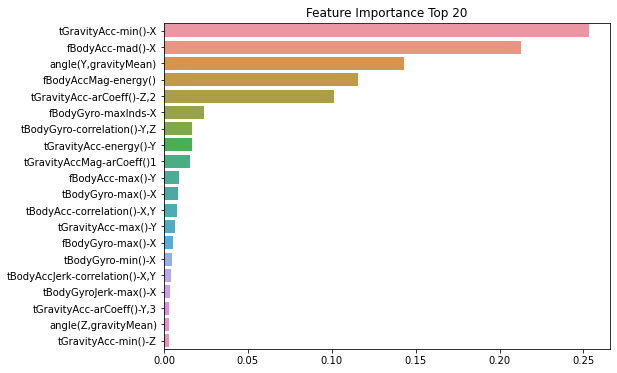

In [73]:
import seaborn as sns

ftr_importance_values=best_dt_clf.feature_importances_
feature_importances=pd.Series(ftr_importance_values, index=X_train.columns)
ftr_top20=feature_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature Importance Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()